<a href="https://colab.research.google.com/github/pavi-ninjaac/Kaggle/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content
### 1) Data Loading:
 a)Install Libraries
b) Load data
 c) Concat train and test
d) Statsitical Summary

In [2]:
# Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load file from local system
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']),index_col=0)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [6]:

test = pd.read_csv(io.BytesIO(uploaded['test.csv']),index_col=0)

In [7]:
print("Train dataset shape -->",train.shape)
print("Test dataset shape --->",test.shape)

Train dataset shape --> (891, 11)
Test dataset shape ---> (418, 10)


concadinate train and test data so that it is easy to make transforations on data

In [8]:
#concadinate train and test data
data = pd.concat([train,test],axis = 0).reset_index(drop = True)
print("Combined dataset shape-->",data.shape)

Combined dataset shape--> (1309, 11)


In [9]:
# Statistical Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


There are 5 Object type features are present so they need to be handled by feature engineering.

In [10]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2) Explotary Data Analysis (EDA)
a)EDA b)correlation with target value

First let's see the distribution of survived in data by Pclass.
Here you can clearly see that the <b>Pclass 3 has the higest number of passengers 491 which is 55.11% of total but the survival rate is only 24.24%. In Pclass 1 Total number of passengers are 216 bu the survival rate is 62.96% that shows lot of people traveled in the Pclass 1 is survived</b>.

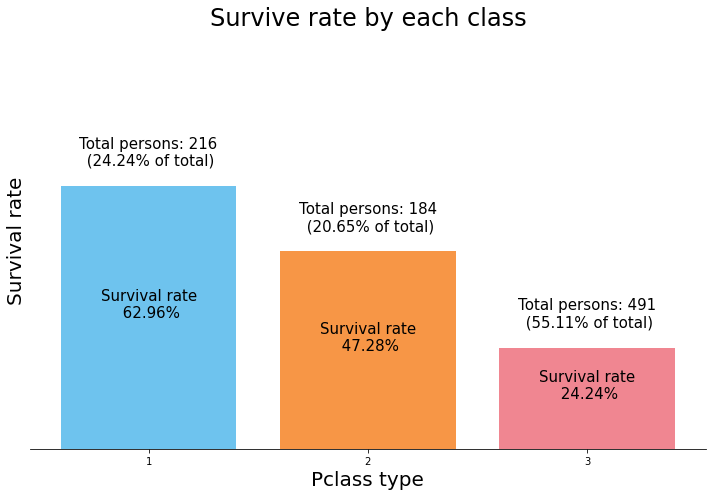

In [12]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()

ax.set_ylim(0,1)

pclass_gp = train.groupby('Pclass')['Survived'].agg([np.mean , len]).reset_index()

Pclass_x = pclass_gp['Pclass'].values
height_y = pclass_gp['mean'].values
no_persons = pclass_gp['len'].values
total_percent = no_persons/sum(pclass_gp['len'])
colors = ["#6EC3EE", "#F79646", "#F08691"]

#plot the bar chart
ax.bar(x=Pclass_x , height  = height_y , color = colors)

#set the font style
fontdict = {'horizontalalignment': 'center', "fontsize":"15"}

for x , y , person , total_person in zip(Pclass_x,height_y,no_persons,total_percent):
    text = f"Total persons: {person}\n ({round(total_person*100, 2)}% of total)"
    ax.text(x, y + .05, s = text, fontdict = fontdict)
    
    text = f"Survival rate\n {round(y*100,2)}%"
    ax.text(x,y/2,s=text , fontdict = fontdict)
#set the ticks 
ax.set_xticks([1, 2, 3])
ax.set_yticks([])

#set the labels
ax.set_xlabel("Pclass type", size = 20)
ax.set_ylabel("Survival rate", size = 20)

# remove the spines
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_title("Survive rate by each class", size = 24)
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


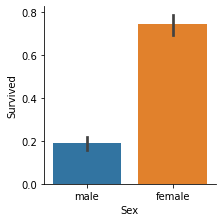

In [13]:
# distribution of the sex
sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [14]:
data.groupby('Sex')['Survived'].sum()

Sex
female    233.0
male      109.0
Name: Survived, dtype: float64

The C Embarked has the high survival rate <b> it has totally 270 passengers from those people 93 people are survived so it has he high 55.35% survival rate</b>. 'S' Embarked has the low 33.69% survival rate it has the large passenger list of 914 and from that only 217 where survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


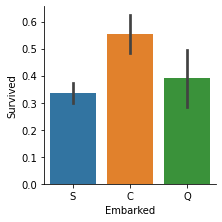

,mean,len,sum
Embarked,,,
C,0.553571,270.0,93.0
Q,0.389610,123.0,30.0
S,0.336957,914.0,217.0


In [15]:
# distribution of the Embarked
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('Embarked')['Survived'].agg([np.mean,len,sum])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


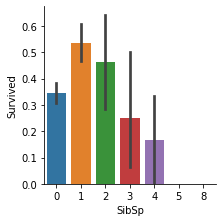

,mean,len,sum
SibSp,,,
0,0.345395,891.0,210.0
1,0.535885,319.0,112.0
2,0.464286,42.0,13.0
3,0.250000,20.0,4.0
4,0.166667,22.0,3.0
5,0.000000,6.0,0.0
8,0.000000,9.0,0.0


In [16]:
# distribution of the SibSp
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('SibSp')['Survived'].agg([np.mean,len,sum])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


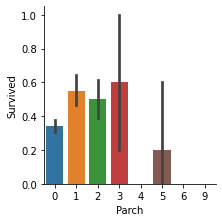

,mean,len,sum
Parch,,,
0,0.343658,1002.0,233.0
1,0.550847,170.0,65.0
2,0.500000,113.0,40.0
3,0.600000,8.0,3.0
4,0.000000,6.0,0.0
5,0.200000,6.0,1.0
6,0.000000,2.0,0.0
9,NaN,2.0,0.0


In [17]:
# distribution of the Parch 
sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('Parch')['Survived'].agg([np.mean,len,sum])

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


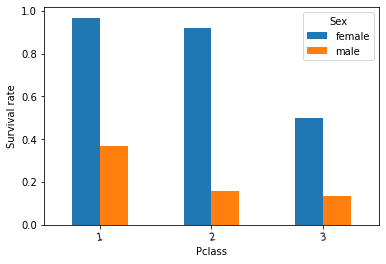

In [18]:
sex_Pclass = data.groupby(['Pclass','Sex'])['Survived'].mean()
sex_Pclass.unstack().plot(kind = 'bar', xlabel='Pclass',ylabel = 'Survival rate' ,rot=10)
sex_Pclass.unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


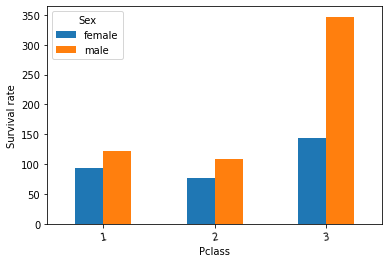

In [19]:
sex_Pclass = data.groupby(['Pclass','Sex'])['Survived'].count()
sex_Pclass.unstack().plot(kind = 'bar', xlabel='Pclass',ylabel = 'Survival rate' ,rot=10)
sex_Pclass.unstack()

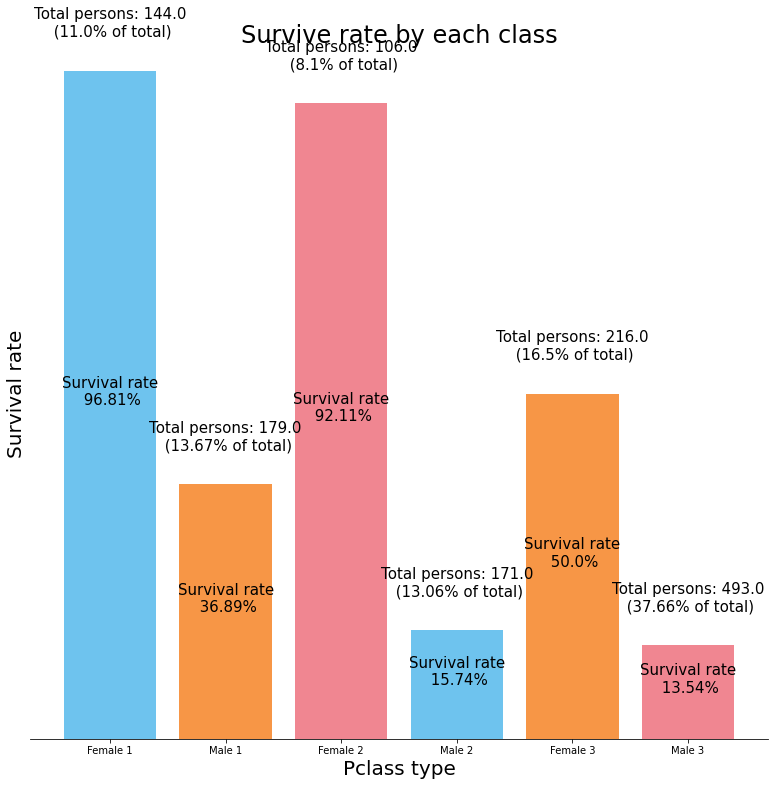

In [20]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot()

ax.set_ylim(0,1)

sex_Pclass = data.groupby(['Pclass','Sex'])['Survived'].agg([np.mean,len]).reset_index()
sex_Pclass['PclassSex'] = sex_Pclass.apply(lambda row : str.title(row["Sex"]) + " " + str(row["Pclass"]), axis = 1)

Pclass_x = sex_Pclass['PclassSex'].values
height_y = sex_Pclass['mean'].values
no_persons = sex_Pclass['len'].values
total_percent = no_persons/sum(sex_Pclass['len'])
colors = ["#6EC3EE", "#F79646", "#F08691"]

#plot the bar chart
ax.bar(x=Pclass_x , height  = height_y , color = colors)

#set the font style
fontdict = {'horizontalalignment': 'center', "fontsize":"15"}

for x , y , person , total_person in zip(Pclass_x,height_y,no_persons,total_percent):
    text = f"Total persons: {person}\n ({round(total_person*100, 2)}% of total)"
    ax.text(x, y + .05, s = text, fontdict = fontdict)
    
    text = f"Survival rate\n {round(y*100,2)}%"
    ax.text(x,y/2,s=text , fontdict = fontdict)
#set the ticks 

ax.set_yticks([])

#set the labels
ax.set_xlabel("Pclass type", size = 20)
ax.set_ylabel("Survival rate", size = 20)

# remove the spines
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_title("Survive rate by each class", size = 24)
fig.tight_layout()

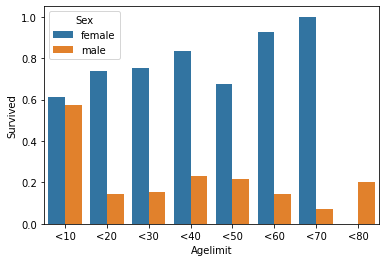

In [21]:
data['Agelimit']=pd.cut(data["Age"].T,bins=8,labels=['<10','<20','<30','<40','<50','<60','<70','<80'])
age_sur = data.groupby(['Sex','Agelimit'])['Survived'].mean().reset_index()
sns.barplot(x='Agelimit',y='Survived',hue='Sex',data=age_sur)

In [22]:
#CorrelTION BETWEEN THE FEATURES
data['Sex'].replace(['male','female'],[1,0],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.108669
Name: Survived, dtype: float64

Here you can see the Fare highly positive corrilation with 'Survived'  and the Sex has high Negative correlation with 'Survived'.

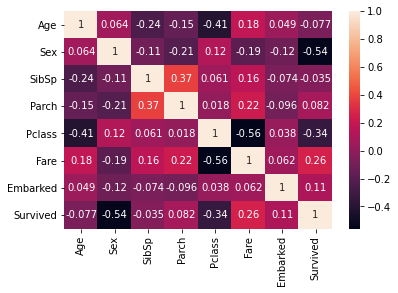

In [23]:
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)

# Missing Value Imputation
a) Find the missing value b) fill the missing value

The dataset contain missing values in Survived,Age,Cabin,Fare,Embaked but the survived column having the missing values in the test dataset so no need to fill that value. Fare and Embarked having so small amoun of missing values and Age and Cabin need to fill with oppropriate  values.

In [24]:
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Agelimit     263
dtype: int64

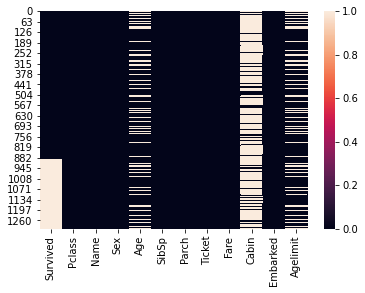

In [25]:
sns.heatmap(data.isnull())

In [26]:
# Fill the missing values
data.loc[data['Fare'].isnull(),:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit
1043,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,0.0,<70


In [27]:
data['Fare']=data['Fare'].fillna(np.mean(data[data['Pclass']==3]['Fare']))
data[data['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit


In [28]:
#handke the Embarked column
data.loc[data['Embarked'].isnull(),:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit
61,1.0,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,<40
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,<70


In [29]:

data['Embarked']=data['Embarked'].fillna(np.mean(data[((data['Pclass']==1) & (data['Sex'] == 0)) ]['Embarked']))
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit


Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

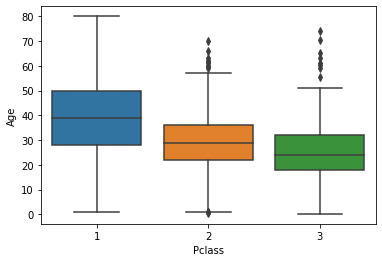

In [30]:
#handle the Age column
#there are lots of values missing in age so gonna fill that value with the average value of Pclass
sns_box=sns.boxplot(x='Pclass',y='Age',data = data)

median = data.groupby('Pclass')['Age'].median()
median

The median age for each Pclass is 39,29,24 . So change the Age of the missing values to the median value of the Pclass.

In [31]:

age_null_index = data[data['Age'].isnull()].index

age_null_index = np.array(age_null_index)

for index in age_null_index:
  data.loc[index,'Age'] = median[data.loc[index,'Pclass']]


data[data['Age'].isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit


Now all the null values are cleared

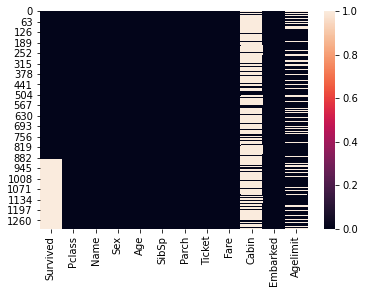

In [32]:
sns.heatmap(data.isnull())

# Feature Engineering
a)New values b) Drop values c) Dealing with catogarical values d)correlation

In [33]:
# New value Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit,FamilySize
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,<30,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,<40,2
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,<30,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,<40,2
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,<40,1


In [34]:
# New Value -- CabbinCode
data['CabinCode'] = data.Cabin.str[0]
data['CabinCode'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [35]:
CabinCode_null_index = data[data['CabinCode'].isnull()].index
CabinCode_null_index =np.array(CabinCode_null_index)
data.loc[CabinCode_null_index,'CabinCode']='O'
data['CabinCode'].unique()


array(['O', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agelimit,FamilySize,CabinCode
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,<30,2,O
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,<40,2,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,<30,1,O
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,<40,2,C
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,<40,1,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,NaN,0.0,NaN,1,O
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0,<40,1,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,<40,1,O
1307,NaN,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,NaN,0.0,NaN,1,O


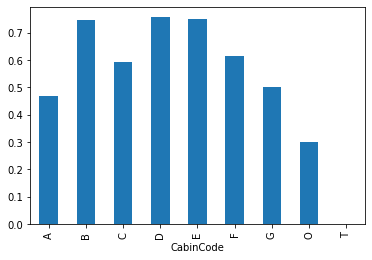

In [36]:
cabin_sur = data.groupby('CabinCode')['Survived'].mean()
cabin_sur.plot(kind='bar')
data

In [37]:
#drop the features
data = data.drop(['Name','Ticket','Cabin','Fare','Age','SibSp','Parch'],axis=1)


In [38]:
data.head(5)

,Survived,Pclass,Sex,Embarked,Agelimit,FamilySize,CabinCode
0,0.0,3,1,0.0,<30,2,O
1,1.0,1,0,1.0,<40,2,C
2,1.0,3,0,0.0,<30,1,O
3,1.0,1,0,0.0,<40,2,C
4,0.0,3,1,0.0,<40,1,O


In [39]:
# Handle with Catogarical Data
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["FamilySize"])
data = pd.get_dummies(data,columns=["Agelimit"])
data = pd.get_dummies(data,columns=["CabinCode"])

data.head()

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_0.528169014084507,Embarked_1.0,Embarked_2.0,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Agelimit_<10,Agelimit_<20,Agelimit_<30,Agelimit_<40,Agelimit_<50,Agelimit_<60,Agelimit_<70,Agelimit_<80,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_O,CabinCode_T
0,0.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Modeling
a)prepare data for modeling b)classification models c)ensemble learning

In [40]:
# split it to train and test
train_data = data.iloc[0:len(train) , :]
predict_data = data.iloc[len(train):,:]
predict_data = predict_data.drop('Survived',axis = 1)
print("shape of the train dataset-->",train_data.shape)
print("Shape of the test dataset--->" , predict_data.shape)
predict_data.head()

shape of the train dataset--> (891, 35)
Shape of the test dataset---> (418, 34)


,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_0.528169014084507,Embarked_1.0,Embarked_2.0,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,Agelimit_<10,Agelimit_<20,Agelimit_<30,Agelimit_<40,Agelimit_<50,Agelimit_<60,Agelimit_<70,Agelimit_<80,CabinCode_A,CabinCode_B,CabinCode_C,CabinCode_D,CabinCode_E,CabinCode_F,CabinCode_G,CabinCode_O,CabinCode_T
891,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
892,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
893,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
894,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
895,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
y = train_data['Survived'].copy()
X = train_data.drop('Survived',axis= 1)


In [42]:
print("shape of the train dataset-->",X.shape)
print("Shape of the train target dataset--->" , y.shape)


shape of the train dataset--> (891, 34)
Shape of the train target dataset---> (891,)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [44]:
print("shape of the train dataset-->",X_train.shape)
print("Shape of the train target dataset--->" , y_train.shape)
print("shape of the test dataset-->",X_test.shape)
print("Shape of the test target dataset--->" , y_test.shape)



shape of the train dataset--> (668, 34)
Shape of the train target dataset---> (668,)
shape of the test dataset--> (223, 34)
Shape of the test target dataset---> (223,)


# Classification Models
1) Linear Classification <br>
2) Logistric Regression <br>
3) KNN <br>
4) Decision Tree Classifier <br>
5) Random Forest Classification <br>
6) Support Vector Machine (SVM) <br>

In [46]:
#Install libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [47]:
# helper function
def train_predict(algoritm,X_train,y_train,X_test,y_test,cv):
  print("Training Started!!!")
  algoritm.fit(X_train,y_train)
  print("Predicting........................")
  y_pred = algoritm.predict(X_test)

  accu_score = accuracy_score(y_test , y_pred)
  cross_score =cross_val_score(algoritm ,X_train,y_train , cv=cv )

  print("Train and Prediction completed!!!")
  print("accuracy Score -->",accu_score)
  print("Cross Validation Score -->",cross_score)


### Logistrc Regression

In [48]:

line = LogisticRegression()
train_predict(line ,X_train,y_train,X_test,y_test,5 )

Training Started!!!
Predicting........................
Train and Prediction completed!!!
accuracy Score --> 0.7937219730941704
Cross Validation Score --> [0.80597015 0.84328358 0.76865672 0.76691729 0.84962406]


###KNN

In [49]:
knn = KNeighborsClassifier()
train_predict(knn ,X_train,y_train,X_test,y_test,5 )

Training Started!!!
Predicting........................
Train and Prediction completed!!!
accuracy Score --> 0.7802690582959642
Cross Validation Score --> [0.75373134 0.81343284 0.70895522 0.72932331 0.82706767]


### DecisionTreeClassifier

In [50]:
tree = DecisionTreeClassifier()
train_predict(tree ,X_train,y_train,X_test,y_test,5 )

Training Started!!!
Predicting........................
Train and Prediction completed!!!
accuracy Score --> 0.7937219730941704
Cross Validation Score --> [0.79104478 0.82089552 0.76865672 0.78195489 0.86466165]


### Random Forest Classifier

In [51]:
rfc = RandomForestClassifier()
train_predict(rfc ,X_train,y_train,X_test,y_test,5 )

Training Started!!!
Predicting........................
Train and Prediction completed!!!
accuracy Score --> 0.7937219730941704
Cross Validation Score --> [0.76119403 0.84328358 0.76865672 0.79699248 0.84962406]


# Support Vecrot Machine

In [52]:
svc = SVC()
train_predict(svc ,X_train,y_train,X_test,y_test,5 )

Training Started!!!
Predicting........................
Train and Prediction completed!!!
accuracy Score --> 0.8116591928251121
Cross Validation Score --> [0.82089552 0.85820896 0.78358209 0.78195489 0.84962406]


# Ensemple Modeling
### Voting Classification

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
estimators = [('li',line) , ('knn_cls', knn) , ('dec_tree' , tree) , ('ran_forest' , rfc) , ('SVC', svc)]

model = VotingClassifier(estimators = estimators , voting = 'hard' , n_jobs= -1)
#fit the model
model.fit(X_train , y_train)
# finding the prediction score
accu_score_ens = model.score(X_test , y_test)

print("Accuracy Score for the Voting Ensemple Learning--->",accu_score_ens)

Accuracy Score for the Voting Ensemple Learning---> 0.8116591928251121


# Result 

we are taking the Voting Classification model.

In [55]:
test_result = pd.Series(model.predict(predict_data), name = "Survived").astype(int)
index = np.array([x for x in range(892,1310)])
index = pd.Series(index,name='PassengerId').astype(int)
results = pd.concat([index, test_result],axis = 1)
results.to_csv("titanic_submission.csv", index = False)

In [56]:
results.head(4)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
